In [1]:
import torchvision
import torch
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from dcai.score import ScoreTracker
from dcai.dataset import TrainDataset, ValidationDataset
from typing import List

In [2]:
# Start a score tracker to track score as function of the number of annotations bought
score_tracker = ScoreTracker(team_name="example-clustering")

# Get a MNIST train data set
train_dataset = TrainDataset()

In [3]:
mask_generic_class = train_dataset.y == 1
idx_generic_class = np.nonzero(mask_generic_class)[0]

In [4]:
from sklearn.cluster import KMeans

In [5]:
x_train = train_dataset.x[mask_generic_class]

In [6]:
x_train.shape

torch.Size([13007, 28, 28])

In [7]:
x_train = x_train.reshape([len(x_train), -1])

In [8]:
k_means = KMeans(n_clusters=2).fit(x_train)

/Users/marcelraas/PycharmProjects/data-centric-ai-hackathon/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
y_pred = k_means.predict(x_train)

In [10]:
idx_pred0 = np.where(y_pred == 0)[0]
idx_pred1 = np.where(y_pred == 1)[0]

In [11]:
labels_for_cluster0 = train_dataset.buy_annotations(idx_generic_class[idx_pred0][:10])

In [12]:
labels_for_cluster1 = train_dataset.buy_annotations(idx_generic_class[idx_pred1][:10])

In [13]:
print(f"Correct labels in cluster 0: {labels_for_cluster0}")
cluster0_label = pd.Series(labels_for_cluster0).value_counts().index[0]
print(f"Dominant label: {cluster0_label}")

Correct labels in cluster 0: [1, 1, 1, 1, 1, 1, 7, 1, 1, 1]
Dominant label: 1


In [14]:
print(f"Correct labels in cluster 1: {labels_for_cluster1}")
cluster1_label = pd.Series(labels_for_cluster1).value_counts().index[0]
print(f"Dominant label: {cluster1_label}")

Correct labels in cluster 1: [7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
Dominant label: 7


In [15]:
train_dataset.y[idx_generic_class[idx_pred0][10:]] = cluster0_label
train_dataset.y[idx_generic_class[idx_pred1][10:]] = cluster1_label

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/marcelraas/PycharmProjects/data-centric-ai-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


┏━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name        ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model       │ SimpleMnistModel          │  1.2 M │
│ 1 │ conf_matrix │ MulticlassConfusionMatrix │      0 │
│ 2 │ precision   │ MulticlassPrecision       │      0 │
│ 3 │ recall      │ MulticlassRecall          │      0 │
└───┴─────────────┴───────────────────────────┴────────┘

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 4

Output()

/Users/marcelraas/PycharmProjects/data-centric-ai-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/tra
iner/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many 
workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is 
the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

/Users/marcelraas/PycharmProjects/data-centric-ai-hackathon/venv/lib/python3.10/site-packages/torchmetrics/function
al/classification/stat_scores.py:408: UserWarning: MPS: no support for int64 reduction ops, casting it to int32 
(Triggered internally at 
/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/ReduceOps.mm:144.)
  fp = confmat.sum(0) - tp

/Users/marcelraas/PycharmProjects/data-centric-ai-hackathon/venv/lib/python3.10/site-packages/pytorch_lightning/tra
iner/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many 
workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is 
the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

`Trainer.fit` stopped: `max_epochs=1` reached.


(LitSimpleMnist(
   (model): SimpleMnistModel(
     (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
     (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
     (dropout1): Dropout(p=0.25, inplace=False)
     (dropout2): Dropout(p=0.5, inplace=False)
     (fc1): Linear(in_features=9216, out_features=128, bias=True)
     (fc2): Linear(in_features=128, out_features=10, bias=True)
   )
   (conf_matrix): MulticlassConfusionMatrix()
   (precision): MulticlassPrecision()
   (recall): MulticlassRecall()
 ),
 Metrics(n_annotations_bought=20, precision_class_1=0.91389114, recall_class_1=0.9911894, precision_class_7=0.9624609, recall_class_7=0.89785993))

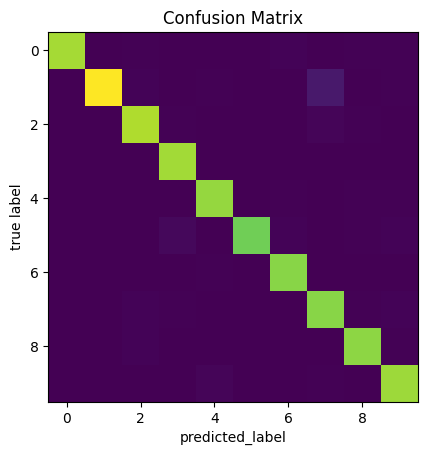

In [16]:
score_tracker.train_and_score_model(train_dataset)

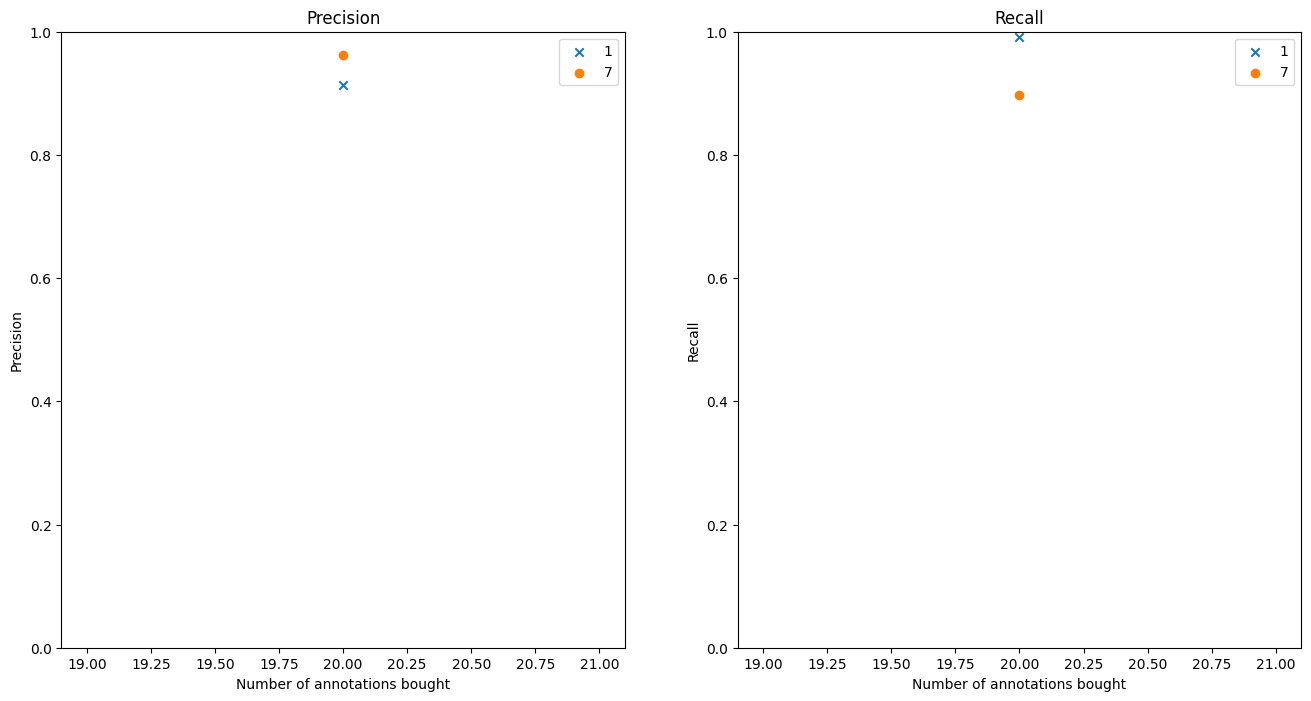

In [17]:
score_tracker.plot_scores()